## Sentiment analysis on imdb dataset
Binary prediction either positive or negative

In [20]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import keras as K
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [8]:
X_train
# Already mapped to integers

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [32]:
print("Number of Label 0: ", sum(y_train == 0))
print("Number of Label 1: ", sum(y_train == 1))

Number of Label 0:  12500
Number of Label 1:  12500


In [3]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [4]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [5]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [6]:
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# Binary crossentropy 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 438s 18ms/step - loss: 0.4709 - acc: 0.7686 - val_loss: 0.4449 - val_acc: 0.8438
Epoch 2/3
24936/24936 [==============================] - 445s 18ms/step - loss: 0.2994 - acc: 0.8773 - val_loss: 0.2919 - val_acc: 0.9062
Epoch 3/3
24936/24936 [==============================] - 479s 19ms/step - loss: 0.2565 - acc: 0.8984 - val_loss: 0.2471 - val_acc: 0.9062


In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.87456


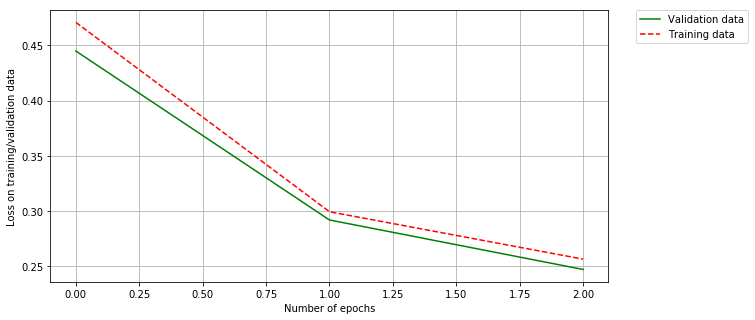

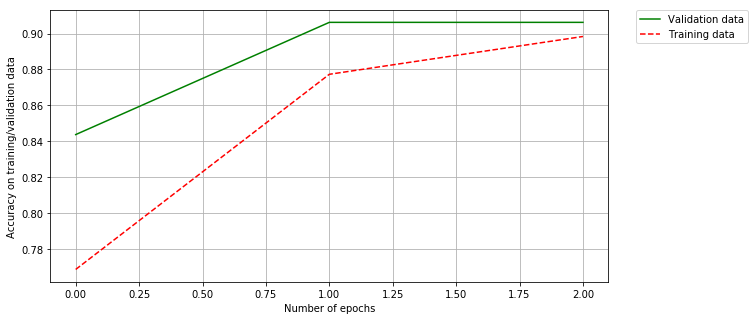

In [18]:
from __future__ import division
import numpy as np

# Plot loss and accuracy 
fig = plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
fig = plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history['val_acc'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['acc'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()